# Imports and Data Set Load Ins

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#!pip install chardet

In [ ]:
#import chardet

In [ ]:
url = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo.csv'

In [ ]:
df1 = pd.read_csv(url)

In [ ]:
url2 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/stats.csv'

In [ ]:
df2 = pd.read_csv(url2)

In [ ]:
df1.head()

entity_id    entity_name entity_code  team_id  total_pitches  \
0     489119    Miley, Wade         Pit      158            885   
1     671106   Allen, Logan         Pit      114            944   
2     608718   Suter, Brent         Pit      115            497   
3     656605  Keller, Mitch         Pit      134           1316   
4     596001   Junis, Jakob         Pit      137            608   

   total_pitches.1  total_pitches_empty  median_seconds_empty  \
0              885                  617                11.261   
1              944                  601                11.516   
2              497                  302                11.923   
3             1316                  842                12.095   
4              608                  363                12.245   

   total_pitches_onbase  median_seconds_empty.1  freq_hot  freq_warm  \
0                   268                  11.261  0.813559   0.184181   
1                   343                  11.516  0.668432   0.330508   
2                   195                  11.923  0.587525   0.408451   
3                   474                  12.095  0.595745   0.401976   
4                   245                  12.245  0.661184   0.337171   

   freq_cold  
0   0.002260  
1   0.001059  
2   0.004024  
3   0.002280  
4   0.001645

In [ ]:
df2.head()

last_name, first_name  player_id  year  p_game  p_formatted_ip   pa  \
0        Colon, Bartolo     112526  2015      33           194.2  815   
1       Hawkins, LaTroy     115629  2015      42            38.2  162   
2           Wolf, Randy     150116  2015       8            34.2  161   
3        Marquis, Jason     150302  2015       9            47.1  216   
4         Burnett, A.J.     150359  2015      26           164.0  699   

   k_percent  bb_percent  on_base_percent  on_base_plus_slg  ...  p_pitchout  \
0       16.7         2.9            0.304             0.741  ...           0   
1       21.0         4.3            0.317             0.733  ...           0   
2       17.4         9.3            0.385             0.906  ...           0   
3       17.1         6.5            0.371             0.917  ...           2   
4       20.5         7.0            0.336             0.717  ...           1   

   p_total_pickoff  p_total_pickoff_attempt  p_total_pickoff_error   woba  \
0                1                       80                      2  0.316   
1                0                        8                      0  0.316   
2                1                       36                      0  0.387   
3                0                        9                      0  0.387   
4                3                       84                      2  0.315   

   xwoba  wobacon  xwobacon  whiff_percent  swing_percent  
0  0.314    0.370     0.368           14.4           48.6  
1  0.290    0.387     0.356           17.0           51.9  
2  0.376    0.441     0.427           16.2           46.5  
3  0.309    0.452     0.353           21.3           46.1  
4  0.323    0.362     0.375           21.1           45.1  

[5 rows x 37 columns]

In [ ]:
df3 = df2[df2['year'] == 2023]

In [ ]:
df3.head()

last_name, first_name  player_id  year  p_game  p_formatted_ip   pa  \
3862      Wainwright, Adam     425794  2023      21           101.0  484   
3863         Greinke, Zack     425844  2023      30           142.1  593   
3864     Verlander, Justin     434378  2023      27           162.1  669   
3865        Jansen, Kenley     445276  2023      51            44.2  188   
3866         Chavez, Jesse     445926  2023      36            34.2  144   

      k_percent  bb_percent  on_base_percent  on_base_plus_slg  ...  \
3862       11.4         8.5            0.400             0.973  ...   
3863       16.4         3.9            0.312             0.779  ...   
3864       21.5         6.7            0.283             0.652  ...   
3865       27.7         9.0            0.314             0.693  ...   
3866       27.1         8.3            0.285             0.582  ...   

      p_pitchout  p_total_pickoff  p_total_pickoff_attempt  \
3862           0                0                       12   
3863           0                5                       41   
3864           0                0                       37   
3865           0                0                        7   
3866           1                0                       10   

      p_total_pickoff_error   woba  xwoba  wobacon  xwobacon  whiff_percent  \
3862                      0  0.414  0.402    0.442     0.427           13.0   
3863                      0  0.332  0.344    0.379     0.394           17.3   
3864                      0  0.284  0.295    0.326     0.342           22.5   
3865                      0  0.303  0.276    0.377     0.333           29.0   
3866                      0  0.263  0.293    0.304     0.352           28.3   

      swing_percent  
3862           41.3  
3863           46.8  
3864           49.6  
3865           52.1  
3866           41.3  

[5 rows x 37 columns]

In [ ]:
df = pd.merge(df3, df1.rename(columns={'entity_id':'player_id'}), on='player_id',  how='left')

In [ ]:
df.head()

last_name, first_name  player_id  year  p_game  p_formatted_ip   pa  \
0      Wainwright, Adam     425794  2023      21           101.0  484   
1         Greinke, Zack     425844  2023      30           142.1  593   
2     Verlander, Justin     434378  2023      27           162.1  669   
3        Jansen, Kenley     445276  2023      51            44.2  188   
4         Chavez, Jesse     445926  2023      36            34.2  144   

   k_percent  bb_percent  on_base_percent  on_base_plus_slg  ...  team_id  \
0       11.4         8.5            0.400             0.973  ...    138.0   
1       16.4         3.9            0.312             0.779  ...    118.0   
2       21.5         6.7            0.283             0.652  ...    117.0   
3       27.7         9.0            0.314             0.693  ...      NaN   
4       27.1         8.3            0.285             0.582  ...      NaN   

   total_pitches  total_pitches.1  total_pitches_empty  median_seconds_empty  \
0          900.0            900.0                518.0                15.474   
1          984.0            984.0                679.0                17.068   
2         1090.0           1090.0                699.0                16.978   
3            NaN              NaN                  NaN                   NaN   
4            NaN              NaN                  NaN                   NaN   

   total_pitches_onbase  median_seconds_empty.1  freq_hot  freq_warm  \
0                 382.0                  15.474  0.270000   0.723333   
1                 305.0                  17.068  0.114837   0.882114   
2                 391.0                  16.978  0.118349   0.879817   
3                   NaN                     NaN       NaN        NaN   
4                   NaN                     NaN       NaN        NaN   

   freq_cold  
0   0.006667  
1   0.003049  
2   0.001835  
3        NaN  
4        NaN  

[5 rows x 49 columns]

# Initial Regression and Matrix Plots

In [ ]:
#plt.figure(figsize = (10,8))
#corrMatrix_stats = df.corr(method = 'pearson')
#sns.heatmap(corrMatrix_stats, annot=True)

In [ ]:
url3 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/stats%202023%20short.csv'
df4 =  pd.read_csv(url3)
df4.head()
df5 = df1[['entity_id', 'total_pitches', 'median_seconds_empty', 'total_pitches_onbase']]
new_df = pd.merge(df4, df5.rename(columns={'entity_id':'player_id'}), on='player_id',  how='left')
new_df.head()

last_name, first_name  player_id  year   pa  k_percent  bb_percent  \
0      Wainwright, Adam     425794  2023  484       11.4         8.5   
1         Greinke, Zack     425844  2023  593       16.4         3.9   
2     Verlander, Justin     434378  2023  669       21.5         6.7   
3        Jansen, Kenley     445276  2023  188       27.7         9.0   
4         Chavez, Jesse     445926  2023  144       27.1         8.3   

   batting_avg  on_base_percent  p_era  p_total_stolen_base  p_total_pickoff  \
0        0.345            0.400   7.40                    4                0   
1        0.282            0.312   5.06                    2                5   
2        0.226            0.283   3.22                   11                0   
3        0.237            0.314   3.63                   13                0   
4        0.203            0.285   1.56                    3                0   

   p_total_pickoff_attempt  p_total_pickoff_error    xba   woba  xwoba   xobp  \
0                       12                      0  0.326  0.414  0.402  0.383   
1                       41                      0  0.290  0.332  0.344  0.322   
2                       37                      0  0.229  0.284  0.295  0.287   
3                        7                      0  0.203  0.303  0.276  0.284   
4                       10                      0  0.233  0.263  0.293  0.312   

   total_pitches  median_seconds_empty  total_pitches_onbase  
0          900.0                15.474                 382.0  
1          984.0                17.068                 305.0  
2         1090.0                16.978                 391.0  
3            NaN                   NaN                   NaN  
4            NaN                   NaN                   NaN

In [ ]:
#plt.figure(figsize = (10,8))
#corrMatrix_stats = new_df.corr(method = 'pearson')
#sns.heatmap(corrMatrix_stats, annot=True)

<Axes: xlabel='median_seconds_empty', ylabel='p_era'>

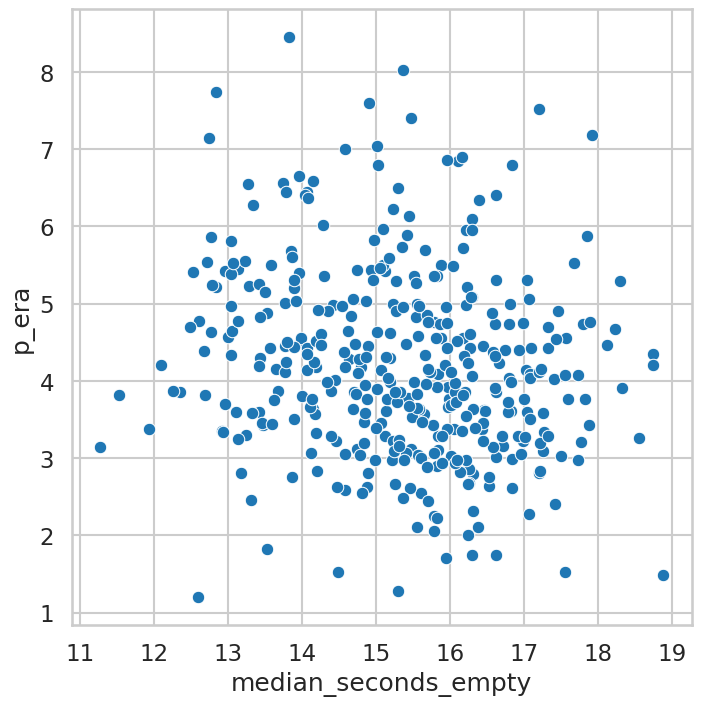

In [ ]:
sns.set_context("talk")
plt.figure(figsize = (8,8))
sns.set_style("whitegrid")
sns.scatterplot(data = new_df, x = "median_seconds_empty", y = "p_era")

<Axes: xlabel='median_seconds_empty', ylabel='k_percent'>

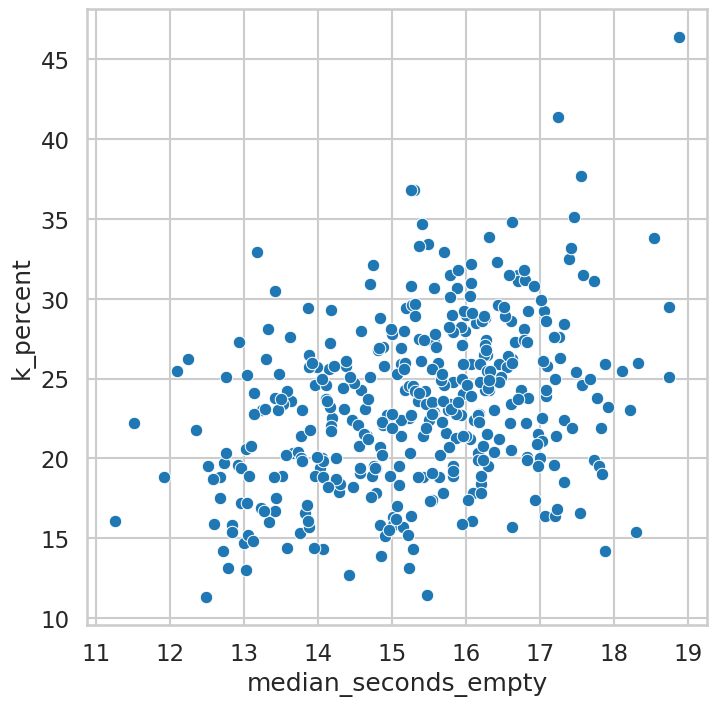

In [ ]:
sns.set_context("talk")
plt.figure(figsize = (8,8))
sns.set_style("whitegrid")
sns.scatterplot(data = new_df, x = "median_seconds_empty", y = "k_percent")

In [ ]:
new_df['median_seconds_empty'].corr(new_df['k_percent'])

0.35258603217200274

### Advanced Topics
### Combine Datasets (.5)
### Linear Model (.25)
### Interactive visualization (.25)
### KNN (.5)
### Database Creation (1)
### Neural Net (1)

# Making final dataset

In [ ]:
url15 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo15.csv'
clock15 =  pd.read_csv(url15, encoding='cp1252')
url16 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo16.csv'
clock16 =  pd.read_csv(url16, encoding='cp1252')
url17 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo17.csv'
clock17 =  pd.read_csv(url17, encoding='cp1252')
url18 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo18.csv'
clock18 =  pd.read_csv(url18, encoding='cp1252')
url19 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo19.csv'
clock19 =  pd.read_csv(url19, encoding='cp1252')
url21 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo21.csv'
clock21 =  pd.read_csv(url21, encoding='cp1252')
url22 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo22.csv'
clock22 =  pd.read_csv(url22, encoding='cp1252')
url23 = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/pitch_tempo23.csv'
clock23 =  pd.read_csv(url23, encoding='cp1252')

In [ ]:
frames = [clock15, clock16, clock17, clock18, clock19, clock21, clock22, clock23]
clock = pd.concat(frames)

In [ ]:
clock.head()

entity_id        entity_name  year entity_code  team_id  total_pitches  \
0     279824      Buehrle, Mark  2015         Pit      141           1302   
1     592314  Foltynewicz, Mike  2015         Pit      144            623   
2     573064      Nuâ€“o, Vidal  2015         Pit      136            662   
3     519242        Sale, Chris  2015         Pit      145           1480   
4     489119        Miley, Wade  2015         Pit      111           1559   

   total_pitches.1  total_pitches_empty  median_seconds_empty  \
0             1302                  851                12.324   
1              623                  391                13.536   
2              662                  429                14.038   
3             1480                  960                14.052   
4             1559                  994                14.125   

   total_pitches_onbase  median_seconds_empty.1  freq_hot  freq_warm  \
0                   451                  12.324  0.539939   0.420123   
1                   232                  13.536  0.438202   0.510433   
2                   233                  14.038  0.404834   0.557402   
3                   520                  14.052  0.424324   0.539189   
4                   565                  14.125  0.428480   0.518922   

   freq_cold  
0   0.039939  
1   0.051364  
2   0.037764  
3   0.036486  
4   0.052598

In [ ]:
urlss = 'https://raw.githubusercontent.com/nathanaelrorie/senior-project/main/Dataset/shortstats.csv'
shortstats = pd.read_csv(urlss)

In [ ]:
shortstats.head()

last_name, first_name  player_id  year   pa  k_percent  bb_percent  \
0        Colon, Bartolo     112526  2015  815       16.7         2.9   
1       Hawkins, LaTroy     115629  2015  162       21.0         4.3   
2           Wolf, Randy     150116  2015  161       17.4         9.3   
3        Marquis, Jason     150302  2015  216       17.1         6.5   
4         Burnett, A.J.     150359  2015  699       20.5         7.0   

   batting_avg  on_base_percent  p_era  p_total_stolen_base  p_total_pickoff  \
0        0.281            0.304   4.16                    6                1   
1        0.286            0.317   3.26                    2                0   
2        0.319            0.385   6.23                    0                1   
3        0.330            0.371   6.46                    6                0   
4        0.275            0.336   3.18                   33                3   

   p_total_pickoff_attempt  p_total_pickoff_error    xba   woba  xwoba   xobp  
0                       80                      2  0.268  0.316  0.314  0.294  
1                        8                      0  0.248  0.316  0.290  0.282  
2                       36                      0  0.304  0.387  0.376  0.375  
3                        9                      0  0.259  0.387  0.309  0.317  
4                       84                      2  0.261  0.315  0.323  0.326

In [ ]:
new_df2 = pd.merge(shortstats, clock.rename(columns={'entity_id':'player_id'}), how="left", left_on=['player_id', 'year'], right_on=['player_id', 'year'])
new_df2.head()
#pd.merge(shortstats, clock.rename(columns={'entity_id':'player_id'}), on='player_id',  how='left')
#new_df2 = df_a.merge(df_b, how='inner', left_on=['A', 'B'], right_on=['A', 'B_new'])

last_name, first_name  player_id  year   pa  k_percent  bb_percent  \
0        Colon, Bartolo     112526  2015  815       16.7         2.9   
1       Hawkins, LaTroy     115629  2015  162       21.0         4.3   
2           Wolf, Randy     150116  2015  161       17.4         9.3   
3        Marquis, Jason     150302  2015  216       17.1         6.5   
4         Burnett, A.J.     150359  2015  699       20.5         7.0   

   batting_avg  on_base_percent  p_era  p_total_stolen_base  ...  team_id  \
0        0.281            0.304   4.16                    6  ...    121.0   
1        0.286            0.317   3.26                    2  ...      NaN   
2        0.319            0.385   6.23                    0  ...      NaN   
3        0.330            0.371   6.46                    6  ...      NaN   
4        0.275            0.336   3.18                   33  ...    134.0   

   total_pitches  total_pitches.1  total_pitches_empty  median_seconds_empty  \
0         1243.0           1243.0                826.0                16.984   
1            NaN              NaN                  NaN                   NaN   
2            NaN              NaN                  NaN                   NaN   
3            NaN              NaN                  NaN                   NaN   
4         1143.0           1143.0                735.0                18.820   

   total_pitches_onbase  median_seconds_empty.1  freq_hot freq_warm  freq_cold  
0                 417.0                  16.984  0.223652  0.661303   0.115044  
1                   NaN                     NaN       NaN       NaN        NaN  
2                   NaN                     NaN       NaN       NaN        NaN  
3                   NaN                     NaN       NaN       NaN        NaN  
4                 408.0                  18.820  0.146982  0.715661   0.137358  

[5 rows x 29 columns]

In [ ]:
print(new_df2.loc[new_df2['last_name, first_name'] == 'Greinke, Zack'])

     last_name, first_name  player_id  year   pa  k_percent  bb_percent  \
34           Greinke, Zack     425844  2015  843       23.7         4.7   
520          Greinke, Zack     425844  2016  667       20.1         6.1   
1018         Greinke, Zack     425844  2017  801       26.8         5.6   
1517         Greinke, Zack     425844  2018  839       23.7         5.1   
2030         Greinke, Zack     425844  2019  810       23.1         3.7   
2550         Greinke, Zack     425844  2021  697       17.2         5.2   
3097         Greinke, Zack     425844  2022  585       12.5         4.6   
3619         Greinke, Zack     425844  2023  593       16.4         3.9   

      batting_avg  on_base_percent  p_era  p_total_stolen_base  ...  team_id  \
34          0.187            0.231   1.66                    7  ...    119.0   
520         0.262            0.306   4.37                    3  ...    109.0   
1018        0.230            0.272   3.20                    5  ...    109.0   
1517

In [ ]:
new_df2.dtypes

last_name, first_name       object
player_id                    int64
year                         int64
pa                           int64
k_percent                  float64
bb_percent                 float64
batting_avg                float64
on_base_percent            float64
p_era                      float64
p_total_stolen_base          int64
p_total_pickoff              int64
p_total_pickoff_attempt      int64
p_total_pickoff_error        int64
xba                        float64
woba                       float64
xwoba                      float64
xobp                       float64
entity_name                 object
entity_code                 object
team_id                    float64
total_pitches              float64
total_pitches.1            float64
total_pitches_empty        float64
median_seconds_empty       float64
total_pitches_onbase       float64
median_seconds_empty.1     float64
freq_hot                   float64
freq_warm                  float64
freq_cold           

In [ ]:
#Drop duplicate columns
new_df2 = new_df2.drop(['total_pitches.1', 'median_seconds_empty.1', 'freq_hot', 'freq_cold', 'freq_warm'], axis = 1)

In [ ]:
new_df2.rename(columns = {'last_name, first_name':'Name'}, inplace = True)

# Year to Year Plots

<Axes: xlabel='median_seconds_empty', ylabel='p_era'>

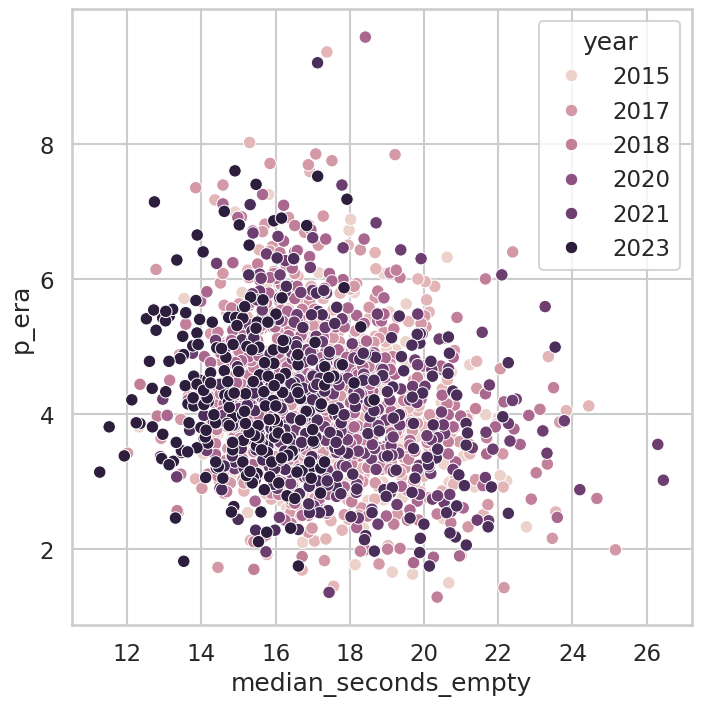

In [ ]:
sns.set_context("talk")
plt.figure(figsize = (8,8))
sns.set_style("whitegrid")
sns.scatterplot(data = new_df2, x = "median_seconds_empty", y = "p_era", hue = 'year')

<Axes: xlabel='median_seconds_empty', ylabel='k_percent'>

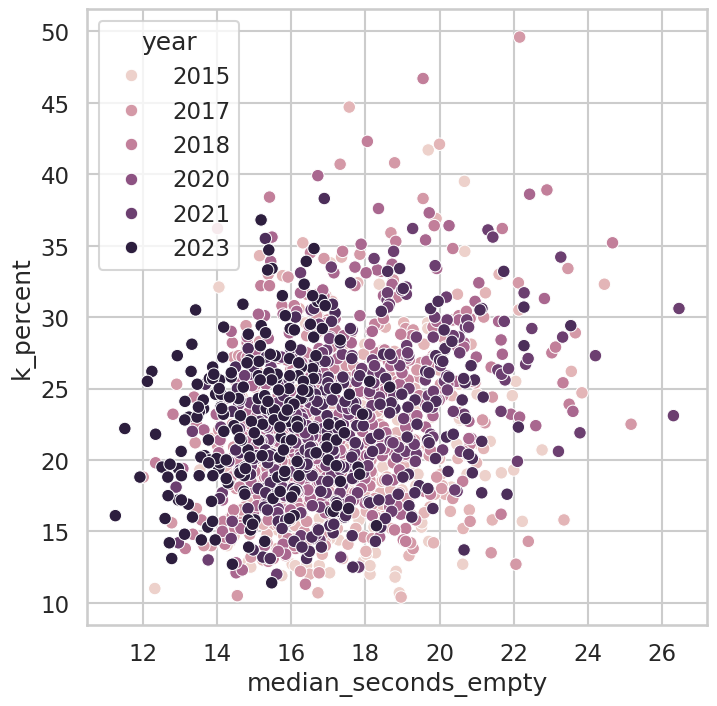

In [ ]:
sns.set_context("talk")
plt.figure(figsize = (8,8))
sns.set_style("whitegrid")
sns.scatterplot(data = new_df2, x = "median_seconds_empty", y = "k_percent", hue = 'year')

In [ ]:
new_df2['median_seconds_empty'].corr(new_df2['k_percent'])

0.25974714026344226

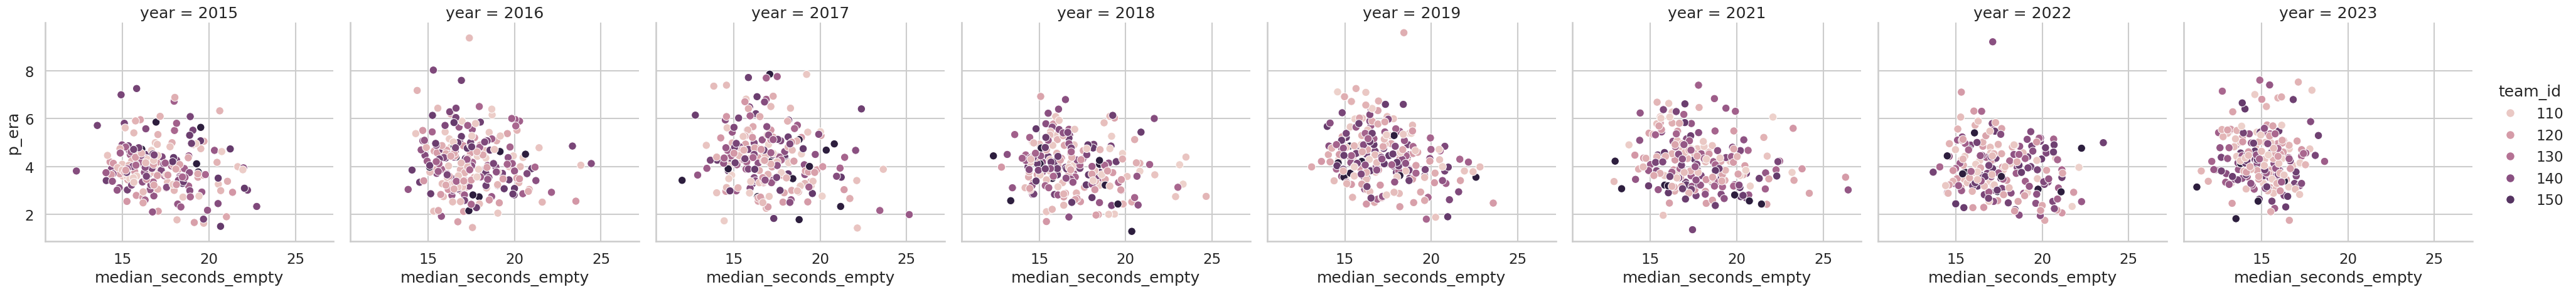

In [ ]:
sns.relplot(
    data=new_df2, x="median_seconds_empty", y="p_era",
    col="year", hue="team_id",
    kind="scatter"
)

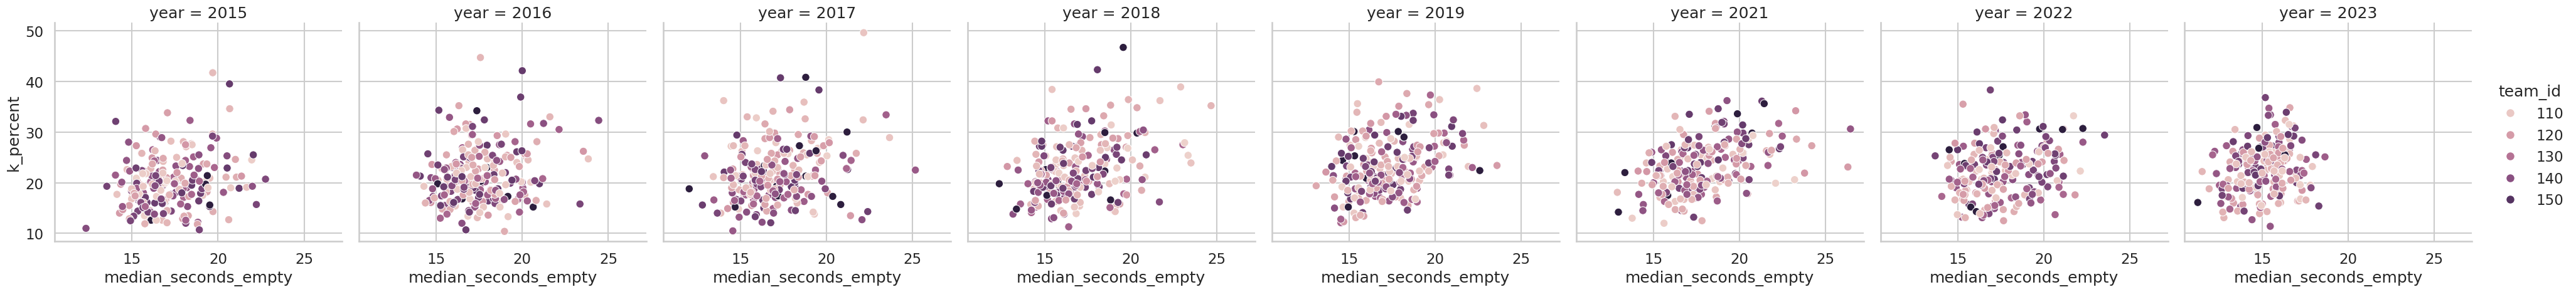

In [ ]:
sns.relplot(
    data=new_df2, x="median_seconds_empty", y="k_percent",
    col="year", hue="team_id",
    kind="scatter"
)

In [ ]:
print(new_df2.groupby("year")["p_era"].describe())
a = new_df2.groupby("year")["p_era"].mean()
b = new_df2.groupby("year")["p_era"].median()
print(a, b)

      count      mean       std   min     25%   50%    75%    max
year                                                             
2015  500.0  4.010180  1.373153  0.73  3.1375  3.90  4.680   9.90
2016  504.0  4.286706  1.461761  0.54  3.2725  4.11  5.150  11.47
2017  505.0  4.385366  1.402340  1.32  3.4100  4.25  5.170   8.63
2018  517.0  4.231103  1.442871  0.78  3.2300  4.09  5.010  12.05
2019  523.0  4.664015  1.601998  1.19  3.6550  4.48  5.550  12.00
2021  547.0  4.351261  1.522577  0.67  3.2400  4.19  5.240  11.27
2022  522.0  4.021973  1.388623  0.75  3.0600  3.86  4.890  10.62
2023  527.0  4.346053  1.441854  0.65  3.3800  4.18  5.115  11.71
year
2015    4.010180
2016    4.286706
2017    4.385366
2018    4.231103
2019    4.664015
2021    4.351261
2022    4.021973
2023    4.346053
Name: p_era, dtype: float64 year
2015    3.90
2016    4.11
2017    4.25
2018    4.09
2019    4.48
2021    4.19
2022    3.86
2023    4.18
Name: p_era, dtype: float64


In [ ]:
print(new_df2.groupby("year")["median_seconds_empty"].describe())
c = new_df2.groupby("year")["median_seconds_empty"].mean()
d = new_df2.groupby("year")["median_seconds_empty"].median()
print(c, d)

      count       mean       std     min     25%      50%       75%     max
year                                                                       
2015  204.0  17.227667  1.966613  12.324  15.690  16.8565  18.47175  22.760
2016  228.0  17.536934  1.884114  13.841  16.221  17.2445  18.60275  24.439
2017  229.0  17.065367  2.100806  12.012  15.682  16.8170  18.25200  25.158
2018  228.0  16.948338  2.164545  12.346  15.415  16.5665  18.31000  24.658
2019  229.0  17.305402  1.993596  13.080  15.849  17.0170  18.51900  23.591
2021  217.0  17.923797  2.322401  12.898  16.377  17.5700  19.27200  26.449
2022  205.0  17.616873  1.982355  13.685  16.116  17.2010  19.12500  23.533
2023  207.0  15.089928  1.437409  11.261  14.018  15.1910  16.07600  18.654
year
2015    17.227667
2016    17.536934
2017    17.065367
2018    16.948338
2019    17.305402
2021    17.923797
2022    17.616873
2023    15.089928
Name: median_seconds_empty, dtype: float64 year
2015    16.8565
2016    17.2445
2017    16.

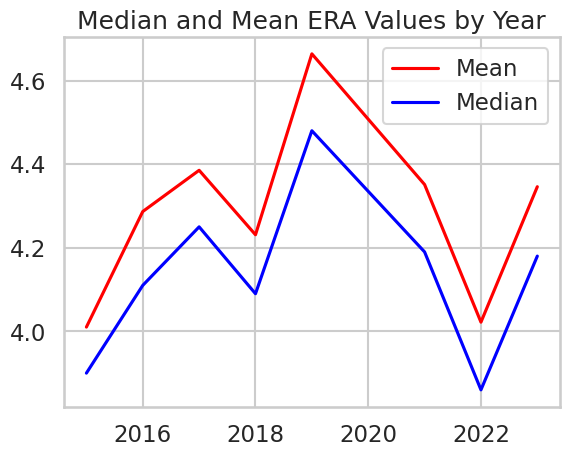

In [ ]:
plt.title("Median and Mean ERA Values by Year")
plt.plot(a, c = 'r', label = 'Mean')
plt.plot(b, c = 'b', label = 'Median')
plt.legend()

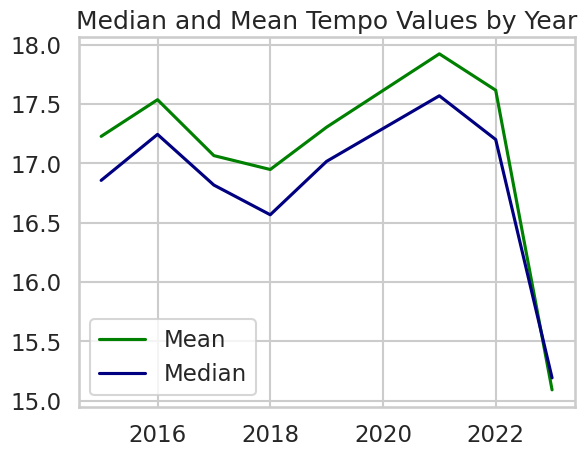

In [ ]:
plt.title("Median and Mean Tempo Values by Year")
plt.plot(c, c = 'g', label = 'Mean')
plt.plot(d, c = 'navy', label = 'Median')
plt.legend()

<Axes: xlabel='median_seconds_empty', ylabel='p_era'>

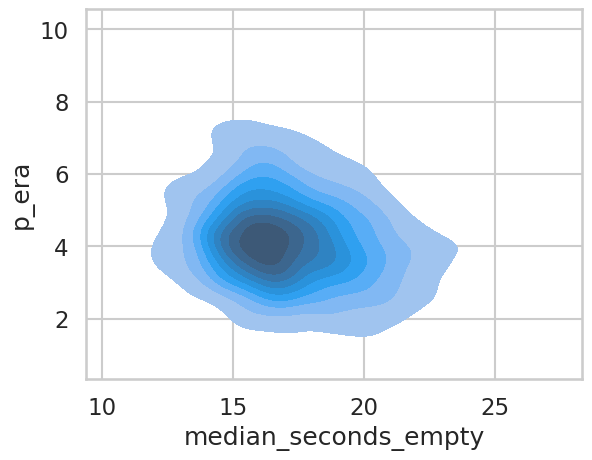

In [ ]:
sns.kdeplot(data = new_df2, x = 'median_seconds_empty', y = 'p_era', fill = True)

<Axes: xlabel='median_seconds_empty', ylabel='k_percent'>

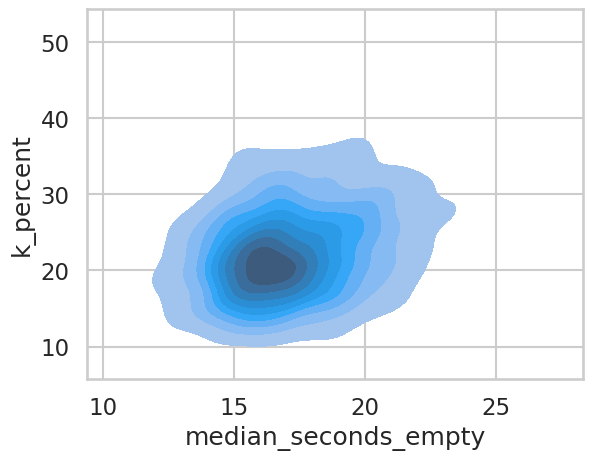

In [ ]:
sns.kdeplot(data = new_df2, x = 'median_seconds_empty', y = 'k_percent', fill = True)

# Investigating the difference between 2022 and 2023

In [ ]:
lasttwo = new_df2[(new_df2['year'] == 2022) | (new_df2['year'] == 2023)]
lasttwo

Name  player_id  year   pa  k_percent  bb_percent  \
3096   Wainwright, Adam     425794  2022  803       17.8         6.7   
3097      Greinke, Zack     425844  2022  585       12.5         4.6   
3098  Verlander, Justin     434378  2022  666       27.8         4.4   
3099    Sánchez, Aníbal     434671  2022  292       16.4        11.3   
3100     Jansen, Kenley     445276  2022  260       32.7         8.5   
...                 ...        ...   ...  ...        ...         ...   
4140       Stone, Gavin     694813  2023  152       14.5         8.6   
4141      Miller, Mason     695243  2023  139       27.3        11.5   
4142      Wicks, Jordan     696136  2023  147       16.3         7.5   
4143  Smith-Shawver, AJ     700363  2023  105       19.0        10.5   
4144     Hartwig, Grant     701643  2023  158       19.0         9.5   

      batting_avg  on_base_percent  p_era  p_total_stolen_base  ...   woba  \
3096        0.261            0.315   3.71                    8  ...  0.306   
3097        0.286            0.320   3.68                    6  ...  0.321   
3098        0.186            0.227   1.75                   10  ...  0.222   
3099        0.217            0.316   4.28                    9  ...  0.320   
3100        0.192            0.265   3.38                   10  ...  0.265   
...           ...              ...    ...                  ...  ...    ...   
4140        0.338            0.401   9.00                    2  ...  0.423   
4141        0.203            0.309   3.78                    1  ...  0.280   
4142        0.252            0.306   4.41                    2  ...  0.317   
4143        0.183            0.276   4.26                    5  ...  0.301   
4144        0.250            0.348   4.84                    1  ...  0.325   

      xwoba   xobp          entity_name  entity_code  team_id  total_pitches  \
3096  0.328  0.326     Wainwright, Adam          Pit    138.0         1537.0   
3097  0.336  0.322        Greinke, Zack          Pit    118.0         1056.0   
3098  0.255  0.248    Verlander, Justin          Pit    117.0         1044.0   
3099  0.332  0.344  Sâ€¡nchez, Anâ€™bal          Pit    120.0          562.0   
3100  0.239  0.247                  NaN          NaN      NaN            NaN   
...     ...    ...                  ...          ...      ...            ...   
4140  0.379  0.379                  NaN          NaN      NaN            NaN   
4141  0.277  0.299                  NaN          NaN      NaN            NaN   
4142  0.311  0.310                  NaN          NaN      NaN            NaN   
4143  0.301  0.296                  NaN          NaN      NaN            NaN   
4144  0.319  0.345                  NaN          NaN      NaN            NaN   

     total_pitches_empty median_seconds_empty  total_pitches_onbase  
3096               999.0               16.797                 538.0  
3097               645.0               17.661                 411.0  
3098               736.0               20.144                 308.0  
3099               392.0               17.190                 170.0  
3100                 NaN                  NaN                   NaN  
...                  ...                  ...                   ...  
4140                 NaN                  NaN                   NaN  
4141                 NaN                  NaN                   NaN  
4142                 NaN                  NaN                   NaN  
4143                 NaN                  NaN                   NaN  
4144                 NaN                  NaN                   NaN  

[1049 rows x 24 columns]

In [ ]:
lasttwo = lasttwo.dropna(subset=['median_seconds_empty'])
lasttwo

Name  player_id  year   pa  k_percent  bb_percent  \
3096   Wainwright, Adam     425794  2022  803       17.8         6.7   
3097      Greinke, Zack     425844  2022  585       12.5         4.6   
3098  Verlander, Justin     434378  2022  666       27.8         4.4   
3099    Sánchez, Aníbal     434671  2022  292       16.4        11.3   
3101      Chavez, Jesse     445926  2022  292       25.3         6.8   
...                 ...        ...   ...  ...        ...         ...   
4127       Kelly, Kevin     687330  2023  276       20.3         5.4   
4134        Pérez, Eury     691587  2023  374       28.9         8.3   
4135         Woo, Bryan     693433  2023  371       25.1         8.4   
4136       Elder, Bryce     693821  2023  732       17.5         8.6   
4138    Pfaadt, Brandon     694297  2023  421       22.3         6.2   

      batting_avg  on_base_percent  p_era  p_total_stolen_base  ...   woba  \
3096        0.261            0.315   3.71                    8  ...  0.306   
3097        0.286            0.320   3.68                    6  ...  0.321   
3098        0.186            0.227   1.75                   10  ...  0.222   
3099        0.217            0.316   4.28                    9  ...  0.320   
3101        0.264            0.316   3.76                    3  ...  0.325   
...           ...              ...    ...                  ...  ...    ...   
4127        0.211            0.283   3.09                    7  ...  0.264   
4134        0.214            0.282   3.15                   11  ...  0.303   
4135        0.227            0.305   4.21                    8  ...  0.305   
4136        0.245            0.316   3.81                    9  ...  0.309   
4138        0.282            0.329   5.72                    8  ...  0.362   

      xwoba   xobp          entity_name  entity_code  team_id  total_pitches  \
3096  0.328  0.326     Wainwright, Adam          Pit    138.0         1537.0   
3097  0.336  0.322        Greinke, Zack          Pit    118.0         1056.0   
3098  0.255  0.248    Verlander, Justin          Pit    117.0         1044.0   
3099  0.332  0.344  Sâ€¡nchez, Anâ€™bal          Pit    120.0          562.0   
3101  0.321  0.317        Chavez, Jesse          Pit    144.0          584.0   
...     ...    ...                  ...          ...      ...            ...   
4127  0.282  0.303         Kelly, Kevin          Pit    139.0          522.0   
4134  0.294  0.279         PÅ½rez, Eury          Pit    146.0          633.0   
4135  0.288  0.300           Woo, Bryan          Pit    136.0          597.0   
4136  0.329  0.335         Elder, Bryce          Pit    144.0         1247.0   
4138  0.325  0.303      Pfaadt, Brandon          Pit    109.0          717.0   

     total_pitches_empty median_seconds_empty  total_pitches_onbase  
3096               999.0               16.797                 538.0  
3097               645.0               17.661                 411.0  
3098               736.0               20.144                 308.0  
3099               392.0               17.190                 170.0  
3101               336.0               13.685                 248.0  
...                  ...                  ...                   ...  
4127               284.0               15.216                 238.0  
4134               447.0               15.310                 186.0  
4135               370.0               18.654                 227.0  
4136               798.0               12.681                 449.0  
4138               458.0               16.173                 259.0  

[412 rows x 24 columns]

In [ ]:
print(lasttwo.loc[lasttwo['Name'] == 'Miller, Mason'])

Empty DataFrame
Columns: [Name, player_id, year, pa, k_percent, bb_percent, batting_avg, on_base_percent, p_era, p_total_stolen_base, p_total_pickoff, p_total_pickoff_attempt, p_total_pickoff_error, xba, woba, xwoba, xobp, entity_name, entity_code, team_id, total_pitches, total_pitches_empty, median_seconds_empty, total_pitches_onbase]
Index: []

[0 rows x 24 columns]


In [ ]:
twentytwo = lasttwo[(lasttwo['year'] == 2022)]
twentytwo

Name  player_id  year   pa  k_percent  bb_percent  \
3096   Wainwright, Adam     425794  2022  803       17.8         6.7   
3097      Greinke, Zack     425844  2022  585       12.5         4.6   
3098  Verlander, Justin     434378  2022  666       27.8         4.4   
3099    Sánchez, Aníbal     434671  2022  292       16.4        11.3   
3101      Chavez, Jesse     445926  2022  292       25.3         6.8   
...                 ...        ...   ...  ...        ...         ...   
3599       Ashby, Aaron     676879  2022  475       26.5         9.9   
3600       Garcia, Luis     677651  2022  643       24.4         7.3   
3603       Gray, Josiah     680686  2022  649       23.7        10.2   
3604      Bradish, Kyle     680694  2022  509       21.8         9.0   
3616      Brieske, Beau     689225  2022  339       15.9         7.4   

      batting_avg  on_base_percent  p_era  p_total_stolen_base  ...   woba  \
3096        0.261            0.315   3.71                    8  ...  0.306   
3097        0.286            0.320   3.68                    6  ...  0.321   
3098        0.186            0.227   1.75                   10  ...  0.222   
3099        0.217            0.316   4.28                    9  ...  0.320   
3101        0.264            0.316   3.76                    3  ...  0.325   
...           ...              ...    ...                  ...  ...    ...   
3599        0.254            0.335   4.44                    7  ...  0.331   
3600        0.222            0.279   3.72                    5  ...  0.295   
3603        0.239            0.324   5.02                   11  ...  0.350   
3604        0.265            0.340   4.90                    1  ...  0.334   
3616        0.236            0.293   4.19                    2  ...  0.306   

      xwoba   xobp          entity_name  entity_code  team_id  total_pitches  \
3096  0.328  0.326     Wainwright, Adam          Pit    138.0         1537.0   
3097  0.336  0.322        Greinke, Zack          Pit    118.0         1056.0   
3098  0.255  0.248    Verlander, Justin          Pit    117.0         1044.0   
3099  0.332  0.344  Sâ€¡nchez, Anâ€™bal          Pit    120.0          562.0   
3101  0.321  0.317        Chavez, Jesse          Pit    144.0          584.0   
...     ...    ...                  ...          ...      ...            ...   
3599  0.301  0.309         Ashby, Aaron          Pit    158.0          903.0   
3600  0.294  0.285         Garcia, Luis          Pit    117.0         1066.0   
3603  0.319  0.308         Gray, Josiah          Pit    120.0         1233.0   
3604  0.327  0.331        Bradish, Kyle          Pit    110.0          911.0   
3616  0.359  0.340        Brieske, Beau          Pit    116.0          541.0   

     total_pitches_empty median_seconds_empty  total_pitches_onbase  
3096               999.0               16.797                 538.0  
3097               645.0               17.661                 411.0  
3098               736.0               20.144                 308.0  
3099               392.0               17.190                 170.0  
3101               336.0               13.685                 248.0  
...                  ...                  ...                   ...  
3599               570.0               14.500                 333.0  
3600               747.0               21.173                 319.0  
3603               835.0               19.673                 398.0  
3604               587.0               18.363                 324.0  
3616               373.0               18.538                 168.0  

[205 rows x 24 columns]

In [ ]:
twentythree = lasttwo[(new_df2['year'] == 2023)]
twentythree

<ipython-input-50-54388e2dfc89>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  twentythree = lasttwo[(new_df2['year'] == 2023)]


Name  player_id  year   pa  k_percent  bb_percent  \
3618   Wainwright, Adam     425794  2023  484       11.4         8.5   
3619      Greinke, Zack     425844  2023  593       16.4         3.9   
3620  Verlander, Justin     434378  2023  669       21.5         6.7   
3624         Hill, Rich     448179  2023  660       19.5         8.8   
3625    Morton, Charlie     450203  2023  716       25.6        11.6   
...                 ...        ...   ...  ...        ...         ...   
4127       Kelly, Kevin     687330  2023  276       20.3         5.4   
4134        Pérez, Eury     691587  2023  374       28.9         8.3   
4135         Woo, Bryan     693433  2023  371       25.1         8.4   
4136       Elder, Bryce     693821  2023  732       17.5         8.6   
4138    Pfaadt, Brandon     694297  2023  421       22.3         6.2   

      batting_avg  on_base_percent  p_era  p_total_stolen_base  ...   woba  \
3618        0.345            0.400   7.40                    4  ...  0.414   
3619        0.282            0.312   5.06                    2  ...  0.332   
3620        0.226            0.283   3.22                   11  ...  0.284   
3624        0.281            0.351   5.41                   25  ...  0.359   
3625        0.244            0.344   3.64                   16  ...  0.318   
...           ...              ...    ...                  ...  ...    ...   
4127        0.211            0.283   3.09                    7  ...  0.264   
4134        0.214            0.282   3.15                   11  ...  0.303   
4135        0.227            0.305   4.21                    8  ...  0.305   
4136        0.245            0.316   3.81                    9  ...  0.309   
4138        0.282            0.329   5.72                    8  ...  0.362   

      xwoba   xobp        entity_name  entity_code  team_id  total_pitches  \
3618  0.402  0.383   Wainwright, Adam          Pit    138.0          900.0   
3619  0.344  0.322      Greinke, Zack          Pit    118.0         1013.0   
3620  0.295  0.287  Verlander, Justin          Pit    117.0         1090.0   
3624  0.360  0.352         Hill, Rich          Pit    135.0         1171.0   
3625  0.330  0.348    Morton, Charlie          Pit    144.0         1361.0   
...     ...    ...                ...          ...      ...            ...   
4127  0.282  0.303       Kelly, Kevin          Pit    139.0          522.0   
4134  0.294  0.279       PÅ½rez, Eury          Pit    146.0          633.0   
4135  0.288  0.300         Woo, Bryan          Pit    136.0          597.0   
4136  0.329  0.335       Elder, Bryce          Pit    144.0         1247.0   
4138  0.325  0.303    Pfaadt, Brandon          Pit    109.0          717.0   

     total_pitches_empty median_seconds_empty  total_pitches_onbase  
3618               518.0               15.474                 382.0  
3619               701.0               17.064                 312.0  
3620               699.0               16.978                 391.0  
3624               682.0               12.518                 489.0  
3625               760.0               14.074                 601.0  
...                  ...                  ...                   ...  
4127               284.0               15.216                 238.0  
4134               447.0               15.310                 186.0  
4135               370.0               18.654                 227.0  
4136               798.0               12.681                 449.0  
4138               458.0               16.173                 259.0  

[207 rows x 24 columns]

In [ ]:
l2 = pd.merge(twentytwo, twentythree, how="left", left_on=['player_id'], right_on=['player_id'])
l2

Name_x  player_id  year_x  pa_x  k_percent_x  bb_percent_x  \
0     Wainwright, Adam     425794    2022   803         17.8           6.7   
1        Greinke, Zack     425844    2022   585         12.5           4.6   
2    Verlander, Justin     434378    2022   666         27.8           4.4   
3      Sánchez, Aníbal     434671    2022   292         16.4          11.3   
4        Chavez, Jesse     445926    2022   292         25.3           6.8   
..                 ...        ...     ...   ...          ...           ...   
200       Ashby, Aaron     676879    2022   475         26.5           9.9   
201       Garcia, Luis     677651    2022   643         24.4           7.3   
202       Gray, Josiah     680686    2022   649         23.7          10.2   
203      Bradish, Kyle     680694    2022   509         21.8           9.0   
204      Brieske, Beau     689225    2022   339         15.9           7.4   

     batting_avg_x  on_base_percent_x  p_era_x  p_total_stolen_base_x  ...  \
0            0.261              0.315     3.71                      8  ...   
1            0.286              0.320     3.68                      6  ...   
2            0.186              0.227     1.75                     10  ...   
3            0.217              0.316     4.28                      9  ...   
4            0.264              0.316     3.76                      3  ...   
..             ...                ...      ...                    ...  ...   
200          0.254              0.335     4.44                      7  ...   
201          0.222              0.279     3.72                      5  ...   
202          0.239              0.324     5.02                     11  ...   
203          0.265              0.340     4.90                      1  ...   
204          0.236              0.293     4.19                      2  ...   

     woba_y  xwoba_y  xobp_y      entity_name_y  entity_code_y  team_id_y  \
0     0.414    0.402   0.383   Wainwright, Adam            Pit      138.0   
1     0.332    0.344   0.322      Greinke, Zack            Pit      118.0   
2     0.284    0.295   0.287  Verlander, Justin            Pit      117.0   
3       NaN      NaN     NaN                NaN            NaN        NaN   
4       NaN      NaN     NaN                NaN            NaN        NaN   
..      ...      ...     ...                ...            ...        ...   
200     NaN      NaN     NaN                NaN            NaN        NaN   
201     NaN      NaN     NaN                NaN            NaN        NaN   
202   0.332    0.342   0.349       Gray, Josiah            Pit      120.0   
203   0.268    0.300   0.298      Bradish, Kyle            Pit      110.0   
204     NaN      NaN     NaN                NaN            NaN        NaN   

     total_pitches_y total_pitches_empty_y median_seconds_empty_y  \
0              900.0                 518.0                 15.474   
1             1013.0                 701.0                 17.064   
2             1090.0                 699.0                 16.978   
3                NaN                   NaN                    NaN   
4                NaN                   NaN                    NaN   
..               ...                   ...                    ...   
200              NaN                   NaN                    NaN   
201              NaN                   NaN                    NaN   
202           1232.0                 717.0                 16.672   
203           1214.0                 811.0                 17.210   
204              NaN                   NaN                    NaN   

     total_pitches_onbase_y  
0                     382.0  
1                     312.0  
2                     391.0  
3                       NaN  
4                       NaN  
..                      ...  
200                     NaN  
201                     NaN  
202                   515.0  
203                   403.0  
204                     NaN  

[205 rows x 47 columns]

In [ ]:
l2['era_diff'] = l2['p_era_x'] - l2['p_era_y']
l2['tempo_diff'] = l2['median_seconds_empty_x'] - l2['median_seconds_empty_y']
l2['k_diff'] = l2['k_percent_x'] - l2['k_percent_y']
l2

Name_x  player_id  year_x  pa_x  k_percent_x  bb_percent_x  \
0     Wainwright, Adam     425794    2022   803         17.8           6.7   
1        Greinke, Zack     425844    2022   585         12.5           4.6   
2    Verlander, Justin     434378    2022   666         27.8           4.4   
3      Sánchez, Aníbal     434671    2022   292         16.4          11.3   
4        Chavez, Jesse     445926    2022   292         25.3           6.8   
..                 ...        ...     ...   ...          ...           ...   
200       Ashby, Aaron     676879    2022   475         26.5           9.9   
201       Garcia, Luis     677651    2022   643         24.4           7.3   
202       Gray, Josiah     680686    2022   649         23.7          10.2   
203      Bradish, Kyle     680694    2022   509         21.8           9.0   
204      Brieske, Beau     689225    2022   339         15.9           7.4   

     batting_avg_x  on_base_percent_x  p_era_x  p_total_stolen_base_x  ...  \
0            0.261              0.315     3.71                      8  ...   
1            0.286              0.320     3.68                      6  ...   
2            0.186              0.227     1.75                     10  ...   
3            0.217              0.316     4.28                      9  ...   
4            0.264              0.316     3.76                      3  ...   
..             ...                ...      ...                    ...  ...   
200          0.254              0.335     4.44                      7  ...   
201          0.222              0.279     3.72                      5  ...   
202          0.239              0.324     5.02                     11  ...   
203          0.265              0.340     4.90                      1  ...   
204          0.236              0.293     4.19                      2  ...   

         entity_name_y  entity_code_y  team_id_y  total_pitches_y  \
0     Wainwright, Adam            Pit      138.0            900.0   
1        Greinke, Zack            Pit      118.0           1013.0   
2    Verlander, Justin            Pit      117.0           1090.0   
3                  NaN            NaN        NaN              NaN   
4                  NaN            NaN        NaN              NaN   
..                 ...            ...        ...              ...   
200                NaN            NaN        NaN              NaN   
201                NaN            NaN        NaN              NaN   
202       Gray, Josiah            Pit      120.0           1232.0   
203      Bradish, Kyle            Pit      110.0           1214.0   
204                NaN            NaN        NaN              NaN   

     total_pitches_empty_y  median_seconds_empty_y  total_pitches_onbase_y  \
0                    518.0                  15.474                   382.0   
1                    701.0                  17.064                   312.0   
2                    699.0                  16.978                   391.0   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   
..                     ...                     ...                     ...   
200                    NaN                     NaN                     NaN   
201                    NaN                     NaN                     NaN   
202                  717.0                  16.672                   515.0   
203                  811.0                  17.210                   403.0   
204                    NaN                     NaN                     NaN   

    era_diff tempo_diff  k_diff  
0      -3.69      1.323     6.4  
1      -1.38      0.597    -3.9  
2      -1.47      3.166     6.3  
3        NaN        NaN     NaN  
4        NaN        NaN     NaN  
..       ...        ...     ...  
200      NaN        NaN     NaN  
201      NaN        NaN     NaN  
202     1.11      3.001     3.2  
203     2.07      1.153    -3.2  
20

In [ ]:
l2 = l2.dropna(subset=['tempo_diff'])
l2

Name_x  player_id  year_x  pa_x  k_percent_x  bb_percent_x  \
0     Wainwright, Adam     425794    2022   803         17.8           6.7   
1        Greinke, Zack     425844    2022   585         12.5           4.6   
2    Verlander, Justin     434378    2022   666         27.8           4.4   
6           Hill, Rich     448179    2022   526         20.7           7.0   
7      Morton, Charlie     450203    2022   728         28.2           8.7   
..                 ...        ...     ...   ...          ...           ...   
197  Whitlock, Garrett     676477    2022   311         26.4           4.8   
198          Sears, JP     676664    2022   288         17.7           8.0   
199   Crawford, Kutter     676710    2022   334         23.1           8.7   
202       Gray, Josiah     680686    2022   649         23.7          10.2   
203      Bradish, Kyle     680694    2022   509         21.8           9.0   

     batting_avg_x  on_base_percent_x  p_era_x  p_total_stolen_base_x  ...  \
0            0.261              0.315     3.71                      8  ...   
1            0.286              0.320     3.68                      6  ...   
2            0.186              0.227     1.75                     10  ...   
6            0.258              0.316     4.27                      7  ...   
7            0.233              0.316     4.34                     10  ...   
..             ...                ...      ...                    ...  ...   
197          0.222              0.260     3.45                      6  ...   
198          0.256              0.319     3.86                      5  ...   
199          0.269              0.335     5.47                      5  ...   
202          0.239              0.324     5.02                     11  ...   
203          0.265              0.340     4.90                      1  ...   

         entity_name_y  entity_code_y  team_id_y  total_pitches_y  \
0     Wainwright, Adam            Pit      138.0            900.0   
1        Greinke, Zack            Pit      118.0           1013.0   
2    Verlander, Justin            Pit      117.0           1090.0   
6           Hill, Rich            Pit      135.0           1171.0   
7      Morton, Charlie            Pit      144.0           1361.0   
..                 ...            ...        ...              ...   
197  Whitlock, Garrett            Pit      111.0            503.0   
198          Sears, JP            Pit      133.0           1214.0   
199   Crawford, Kutter            Pit      111.0            868.0   
202       Gray, Josiah            Pit      120.0           1232.0   
203      Bradish, Kyle            Pit      110.0           1214.0   

     total_pitches_empty_y  median_seconds_empty_y  total_pitches_onbase_y  \
0                    518.0                  15.474                   382.0   
1                    701.0                  17.064                   312.0   
2                    699.0                  16.978                   391.0   
6                    682.0                  12.518                   489.0   
7                    760.0                  14.074                   601.0   
..                     ...                     ...                     ...   
197                  334.0                  13.498                   169.0   
198                  763.0                  17.433                   451.0   
199                  540.0                  15.164                   328.0   
202                  717.0                  16.672                   515.0   
203                  811.0                  17.210                   403.0   

    era_diff tempo_diff  k_diff  
0      -3.69      1.323     6.4  
1      -1.38      0.597    -3.9  
2      -1.47      3.166     6.3  
6      -1.14      2.788     1.2  
7       0.70      3.245     2.6  
..       ...        ...     ...  
197    -1.70      2.750     2.7  
198    -0.68      3.700    -4.2  
199     1.43      1.803    -2.5  
202     1.11      3.001     3.2  
20

In [ ]:
l2.rename(columns = {'last_name, first_name_x':'Name'}, inplace = True)
l2

<ipython-input-54-4b3b0fdee252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  l2.rename(columns = {'last_name, first_name_x':'Name'}, inplace = True)


Name_x  player_id  year_x  pa_x  k_percent_x  bb_percent_x  \
0     Wainwright, Adam     425794    2022   803         17.8           6.7   
1        Greinke, Zack     425844    2022   585         12.5           4.6   
2    Verlander, Justin     434378    2022   666         27.8           4.4   
6           Hill, Rich     448179    2022   526         20.7           7.0   
7      Morton, Charlie     450203    2022   728         28.2           8.7   
..                 ...        ...     ...   ...          ...           ...   
197  Whitlock, Garrett     676477    2022   311         26.4           4.8   
198          Sears, JP     676664    2022   288         17.7           8.0   
199   Crawford, Kutter     676710    2022   334         23.1           8.7   
202       Gray, Josiah     680686    2022   649         23.7          10.2   
203      Bradish, Kyle     680694    2022   509         21.8           9.0   

     batting_avg_x  on_base_percent_x  p_era_x  p_total_stolen_base_x  ...  \
0            0.261              0.315     3.71                      8  ...   
1            0.286              0.320     3.68                      6  ...   
2            0.186              0.227     1.75                     10  ...   
6            0.258              0.316     4.27                      7  ...   
7            0.233              0.316     4.34                     10  ...   
..             ...                ...      ...                    ...  ...   
197          0.222              0.260     3.45                      6  ...   
198          0.256              0.319     3.86                      5  ...   
199          0.269              0.335     5.47                      5  ...   
202          0.239              0.324     5.02                     11  ...   
203          0.265              0.340     4.90                      1  ...   

         entity_name_y  entity_code_y  team_id_y  total_pitches_y  \
0     Wainwright, Adam            Pit      138.0            900.0   
1        Greinke, Zack            Pit      118.0           1013.0   
2    Verlander, Justin            Pit      117.0           1090.0   
6           Hill, Rich            Pit      135.0           1171.0   
7      Morton, Charlie            Pit      144.0           1361.0   
..                 ...            ...        ...              ...   
197  Whitlock, Garrett            Pit      111.0            503.0   
198          Sears, JP            Pit      133.0           1214.0   
199   Crawford, Kutter            Pit      111.0            868.0   
202       Gray, Josiah            Pit      120.0           1232.0   
203      Bradish, Kyle            Pit      110.0           1214.0   

     total_pitches_empty_y  median_seconds_empty_y  total_pitches_onbase_y  \
0                    518.0                  15.474                   382.0   
1                    701.0                  17.064                   312.0   
2                    699.0                  16.978                   391.0   
6                    682.0                  12.518                   489.0   
7                    760.0                  14.074                   601.0   
..                     ...                     ...                     ...   
197                  334.0                  13.498                   169.0   
198                  763.0                  17.433                   451.0   
199                  540.0                  15.164                   328.0   
202                  717.0                  16.672                   515.0   
203                  811.0                  17.210                   403.0   

    era_diff tempo_diff  k_diff  
0      -3.69      1.323     6.4  
1      -1.38      0.597    -3.9  
2      -1.47      3.166     6.3  
6      -1.14      2.788     1.2  
7       0.70      3.245     2.6  
..       ...        ...     ...  
197    -1.70      2.750     2.7  
198    -0.68      3.700    -4.2  
199     1.43      1.803    -2.5  
202     1.11      3.001     3.2  
20

[Text(0.5, 1.0, 'ERA vs Tempo Difference')]

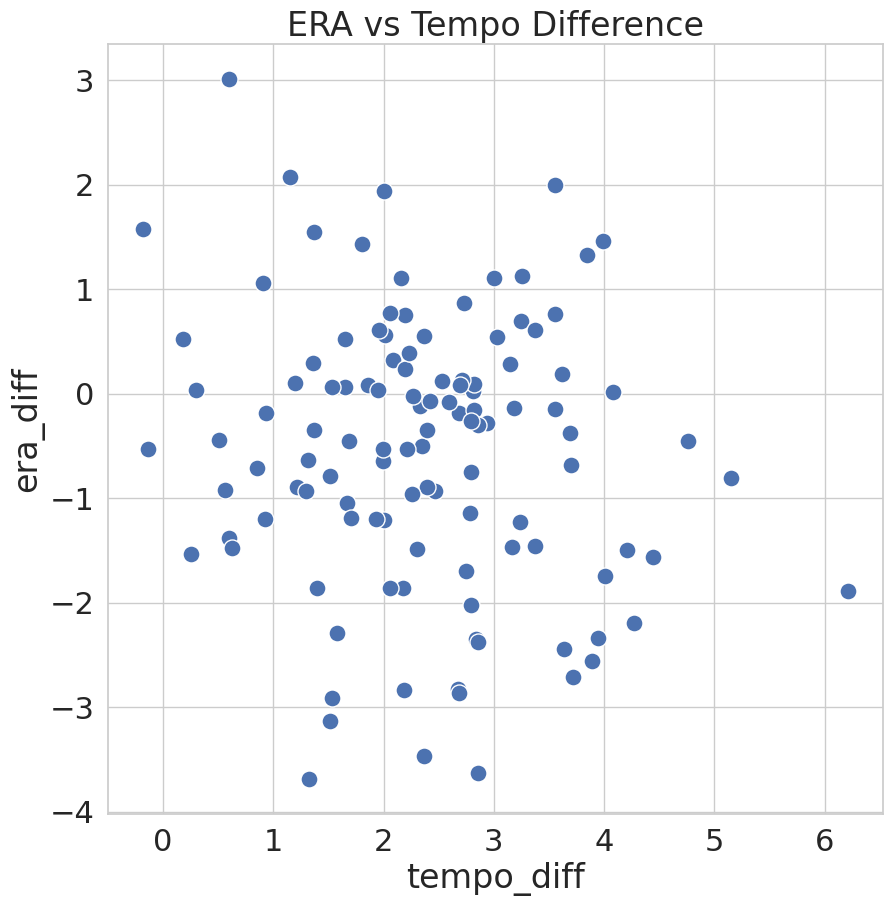

In [ ]:
sns.set_context("talk")
plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid', font_scale = 2)
sns.scatterplot(data = l2, x = "tempo_diff", y = "era_diff", s = 150).set(title = 'ERA vs Tempo Difference')

In [ ]:
l2['tempo_diff'].corr(l2['era_diff'])

-0.1383019712895459

[Text(0.5, 1.0, 'Strikeout vs Tempo Difference')]

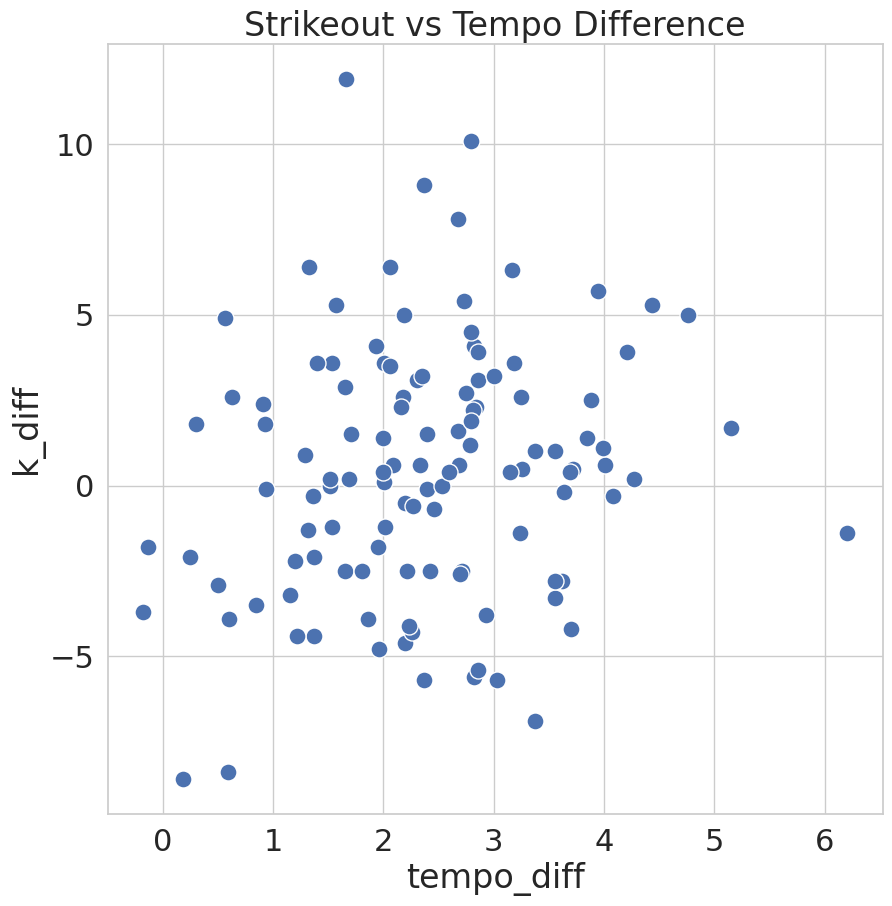

In [ ]:
sns.set_context("talk")
plt.figure(figsize = (10,10))
sns.set(style = 'whitegrid', font_scale = 2)
sns.scatterplot(data = l2, x = "tempo_diff", y = "k_diff", s = 150).set(title = 'Strikeout vs Tempo Difference')

In [ ]:
l2['tempo_diff'].corr(l2['k_diff'])

0.17543121732525094

<Axes: xlabel='tempo_diff', ylabel='p_era_y'>

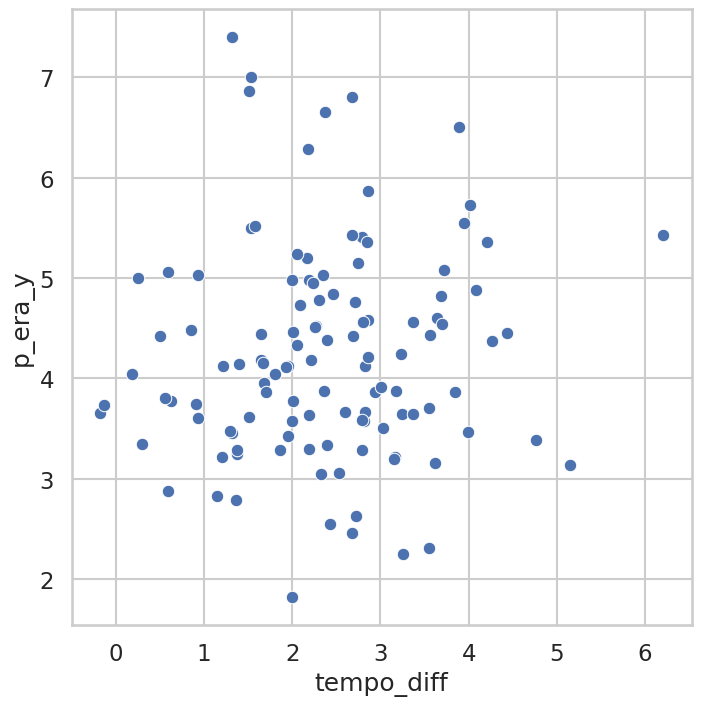

In [ ]:
sns.set_context("talk")
plt.figure(figsize = (8,8))
sns.set_style("whitegrid")
sns.scatterplot(data = l2, x = "tempo_diff", y = "p_era_y")

In [ ]:
l2['tempo_diff'].corr(l2['p_era_y'])

0.07109431942904072

<Axes: xlabel='tempo_diff', ylabel='k_percent_y'>

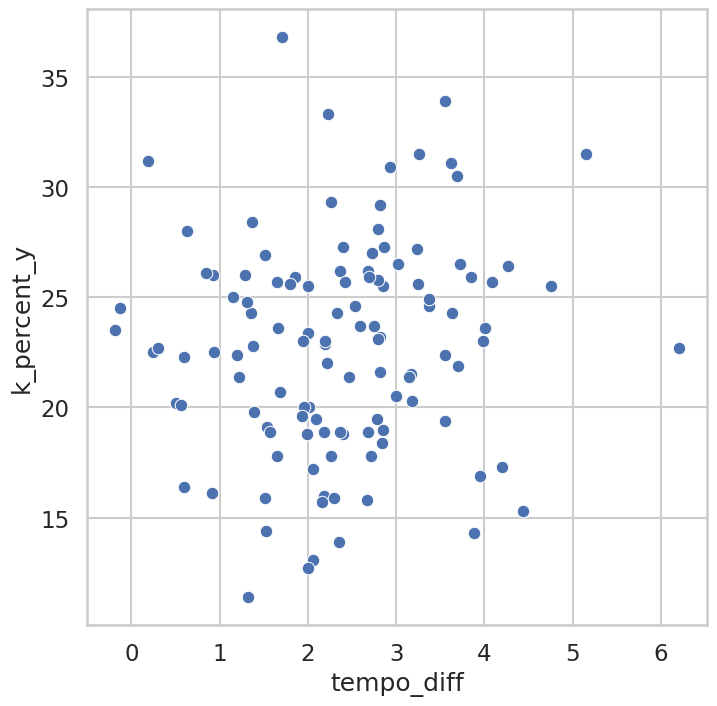

In [ ]:
sns.set_context("talk")
plt.figure(figsize = (8,8))
sns.set_style("whitegrid")
sns.scatterplot(data = l2, x = "tempo_diff", y = "k_percent_y")

In [ ]:
l2['tempo_diff'].corr(l2['k_percent_y'])

0.11250075356627277

# 3D Plot

In [ ]:
from mpl_toolkits import mplot3d

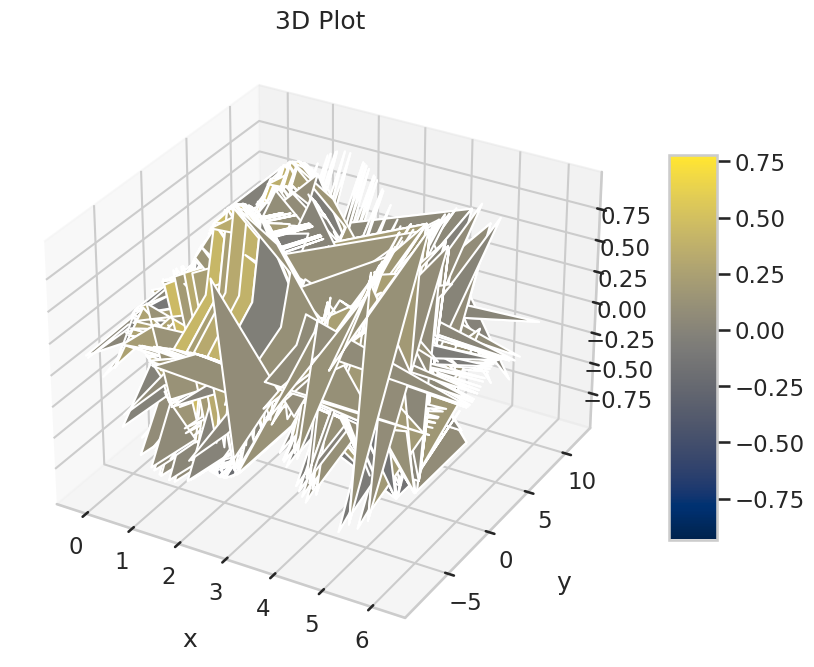

In [ ]:
# Creating dataset
x = l2['tempo_diff']
y = l2['k_diff']
# z = l2['era_diff']

X, Y = np.meshgrid(x, y)
Z = np.sin(X)*np.cos(Y)

fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

# ax.scatter(x, y, z, c = 'r', s = 50)
ax.set_title('3D Plot')

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

In [ ]:
#fig = plt.figure(figsize = (12,10))
#ax = plt.axes(projection='3d')

#x = l2['tempo_diff']
#y = l2['k_diff']
#z = l2['era_diff']

#X, Y = np.meshgrid(x, y)
#Z = np.sin(X)*np.cos(Y)

#surf = ax.plot_surface(x, y, z, cmap = plt.cm.cividis)

# Set axes label
#ax.set_xlabel('x', labelpad=20)
#ax.set_ylabel('y', labelpad=20)
#ax.set_zlabel('z', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)

#plt.show()

# Bootstrap

In [ ]:
def one_bootstrap_median(sample_df):
  resample = sample_df.sample(n=len(sample_df), replace = True)
  return np.median(resample["median_seconds_empty"])

In [ ]:
one_bootstrap_median(twentythree)

15.117

In [ ]:
pop_median = np.percentile(twentythree["median_seconds_empty"], 50)
print(pop_median)

15.191


In [ ]:
numsim = 3000
bootstrap_medians = np.zeros(numsim)
for i in range(numsim):
  bootstrap_medians[i] = one_bootstrap_median(twentythree)

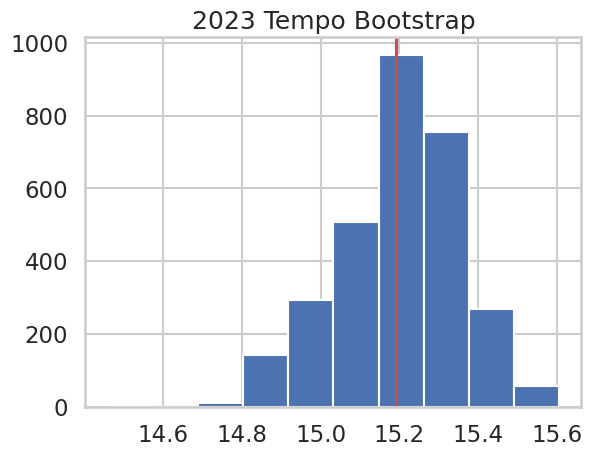

In [ ]:
plt.title("2023 Tempo Bootstrap")
plt.hist(bootstrap_medians)
plt.axvline(x = pop_median, c = 'r')

In [ ]:
left = np.percentile(bootstrap_medians, 2.5)
right = np.percentile(bootstrap_medians, 97.5)
print("interval is from "+str(left)+" to "+str(right))

interval is from 14.873 to 15.484


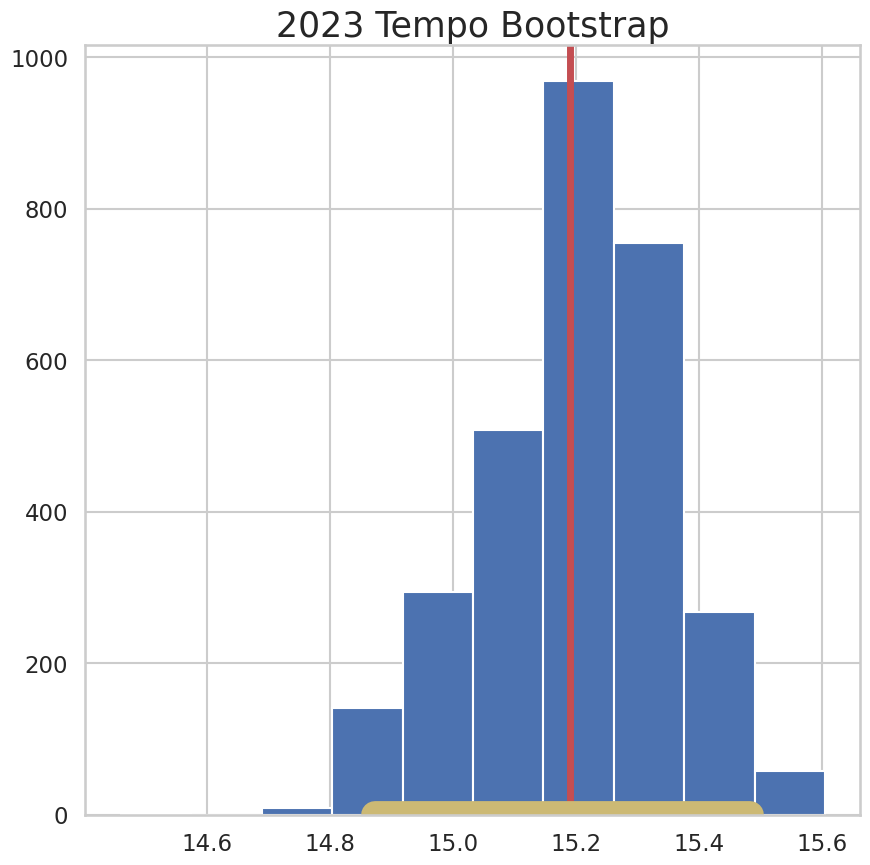

In [ ]:
interval = np.array([left, right])
plt.figure(figsize = (10,10))
plt.title("2023 Tempo Bootstrap", fontsize = 25)
plt.hist(bootstrap_medians)
plt.axvline(x = pop_median, c = 'r', lw = 5)
plt.plot(interval, [0, 0], linewidth = 20, c = 'y')

In [ ]:
def one_bootstrap_median(sample_df):
  resample = sample_df.sample(n=len(sample_df), replace = True)
  return np.median(resample["tempo_diff"])

In [ ]:
one_bootstrap_median(l2)

2.2659999999999982

In [ ]:
pop_median = np.percentile(l2["tempo_diff"], 50)
print(pop_median)

2.3374999999999995


In [ ]:
numsim = 3000
bootstrap_medians = np.zeros(numsim)
for i in range(numsim):
  bootstrap_medians[i] = one_bootstrap_median(l2)

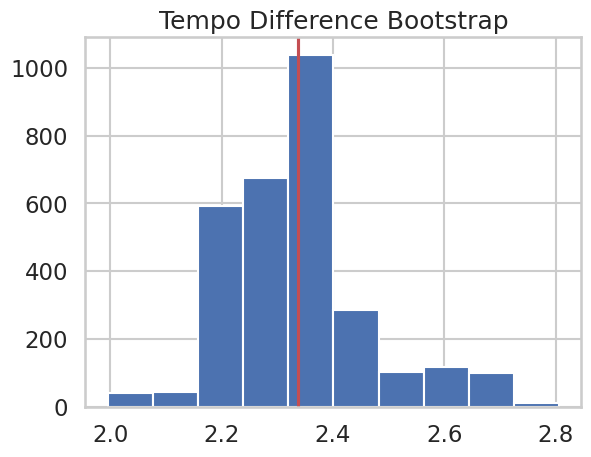

In [ ]:
plt.title("Tempo Difference Bootstrap")
plt.hist(bootstrap_medians)
plt.axvline(x = pop_median, c = 'r')

In [ ]:
left = np.percentile(bootstrap_medians, 2.5)
right = np.percentile(bootstrap_medians, 97.5)
print("interval is from "+str(left)+" to "+str(right))

interval is from 2.133 to 2.6769999999999996


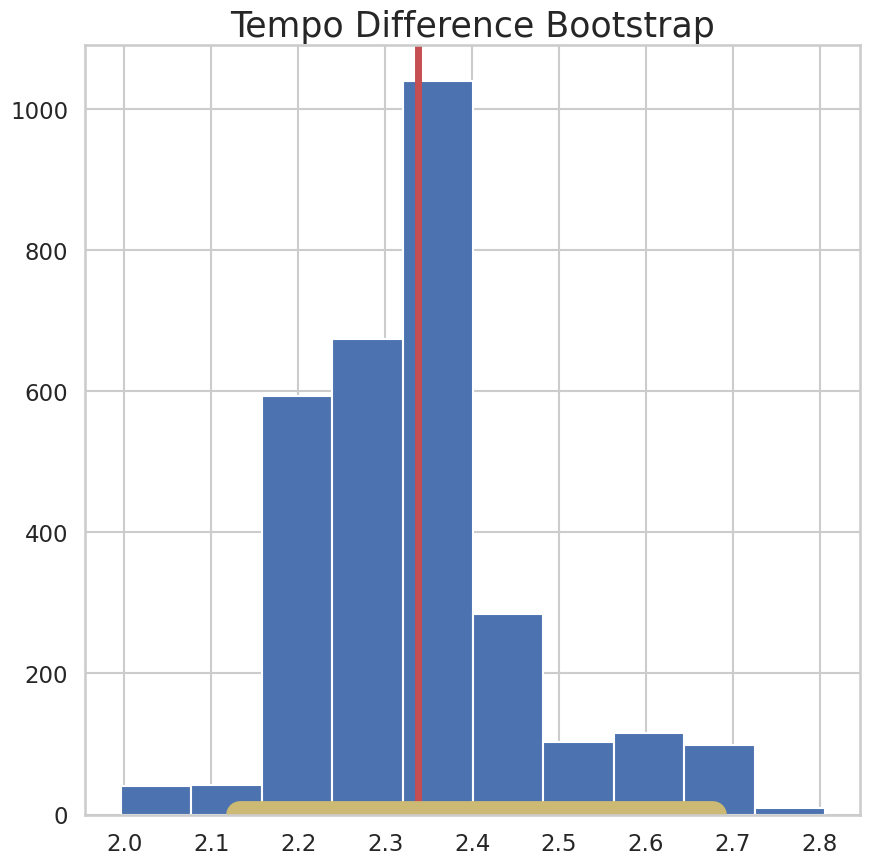

In [ ]:
interval = np.array([left, right])
plt.figure(figsize = (10,10))
plt.title("Tempo Difference Bootstrap", fontsize = 25)
plt.hist(bootstrap_medians)
plt.axvline(x = pop_median, c = 'r', lw = 5)
plt.plot(interval, [0, 0], linewidth = 20, c = 'y')

# Permutation Test

**Hypothesis**

---



Null Hypothesis: the tempos from 2022 and 2023 are the same

Alternative Hypothesis: the tempos from 2022 and 2023 are different

In [ ]:
tempos22 = np.array(twentytwo['median_seconds_empty'])
print(tempos22)
tempos23 = np.array(twentythree['median_seconds_empty'])
print(tempos23)

[16.797 17.661 20.144 17.19  13.685 16.956 15.306 17.319 16.612 15.651
 19.336 17.695 16.666 15.982 21.139 17.632 15.276 20.227 19.888 16.85
 16.562 17.407 20.938 17.441 16.996 23.533 16.974 19.883 18.191 21.816
 17.418 17.599 17.767 17.667 16.989 15.517 19.158 16.377 17.136 16.643
 16.557 18.884 16.043 15.303 17.643 14.902 15.528 17.131 22.27  16.52
 19.896 20.331 18.548 18.49  18.08  18.152 15.477 19.173 17.123 20.185
 15.073 17.173 18.652 15.436 15.235 20.657 14.61  15.109 17.008 20.846
 17.943 15.853 19.012 16.15  15.754 20.608 16.906 20.119 19.018 19.623
 19.817 19.756 19.997 18.922 17.294 17.727 17.201 16.988 20.88  18.031
 20.683 14.068 15.658 14.622 20.778 20.647 14.835 18.114 16.907 20.881
 15.365 19.125 15.097 15.325 15.435 16.258 17.467 16.398 16.074 19.9
 16.75  15.532 18.794 18.269 19.717 14.99  16.512 16.414 15.359 16.112
 15.388 17.03  18.361 17.632 20.084 17.845 17.04  15.462 17.45  18.661
 18.427 17.102 14.981 21.135 20.368 19.391 14.84  19.676 19.96  16.814
 16.647 14

In [ ]:
l2tempos = np.concatenate((tempos22, tempos23))
print(l2tempos)

[16.797 17.661 20.144 17.19  13.685 16.956 15.306 17.319 16.612 15.651
 19.336 17.695 16.666 15.982 21.139 17.632 15.276 20.227 19.888 16.85
 16.562 17.407 20.938 17.441 16.996 23.533 16.974 19.883 18.191 21.816
 17.418 17.599 17.767 17.667 16.989 15.517 19.158 16.377 17.136 16.643
 16.557 18.884 16.043 15.303 17.643 14.902 15.528 17.131 22.27  16.52
 19.896 20.331 18.548 18.49  18.08  18.152 15.477 19.173 17.123 20.185
 15.073 17.173 18.652 15.436 15.235 20.657 14.61  15.109 17.008 20.846
 17.943 15.853 19.012 16.15  15.754 20.608 16.906 20.119 19.018 19.623
 19.817 19.756 19.997 18.922 17.294 17.727 17.201 16.988 20.88  18.031
 20.683 14.068 15.658 14.622 20.778 20.647 14.835 18.114 16.907 20.881
 15.365 19.125 15.097 15.325 15.435 16.258 17.467 16.398 16.074 19.9
 16.75  15.532 18.794 18.269 19.717 14.99  16.512 16.414 15.359 16.112
 15.388 17.03  18.361 17.632 20.084 17.845 17.04  15.462 17.45  18.661
 18.427 17.102 14.981 21.135 20.368 19.391 14.84  19.676 19.96  16.814
 16.647 14

In [ ]:
numsim = 3000
num = int(len(l2tempos)/2)
simulated_diffs = []
print(num)
for i in range(numsim):
    tempos_shuffled = np.random.permutation(l2tempos)
    tempos22_simulated = tempos_shuffled[:num]
    tempos23_simulated = tempos_shuffled[num:]
    simulated_diff = np.mean(tempos22_simulated) - np.mean(tempos23_simulated)
    simulated_diffs.append(simulated_diff)

simulated_diffs

206


[-0.28910679611650636,
 -0.039786407766989385,
 -0.39631067961164845,
 -0.05627184466019486,
 0.2041650485436861,
 0.35752427184466384,
 0.06379611650485728,
 0.16823300970873944,
 0.2788834951456316,
 -0.23599029126213367,
 -0.013038834951458966,
 0.07122330097087826,
 -0.4403203883495159,
 -0.1983689320388322,
 -0.19763106796116503,
 -0.062640776699034,
 -0.27912621359223166,
 -0.20336893203883477,
 -0.2352815533980568,
 -0.12255339805825471,
 0.05172815533980568,
 0.22899029126213577,
 -0.10752427184466029,
 0.23066019417475303,
 -0.012106796116505336,
 0.021728155339804545,
 0.1324660194174747,
 -0.09740776699029041,
 0.2335339805825285,
 -0.21244660194174259,
 -0.19558252427184541,
 0.320048543689321,
 0.3009417475728142,
 0.1989126213592236,
 -0.07873786407767014,
 -0.014912621359222555,
 -0.18360194174757538,
 0.12829126213592446,
 0.16051456310679413,
 0.04239805825242726,
 -0.2629999999999981,
 0.183757281553401,
 0.15037864077670093,
 0.06329126213592318,
 0.03495145631067942

In [ ]:
diff = np.mean(tempos22) - np.mean(tempos23)
diff

2.5269456344998247

In [ ]:
upper_bound = np.quantile(simulated_diffs, 0.975)
lower_bound = np.quantile(simulated_diffs, 0.025)

In [ ]:
print(lower_bound.round(2), upper_bound.round(2), diff.round(2))

-0.41 0.41 2.53


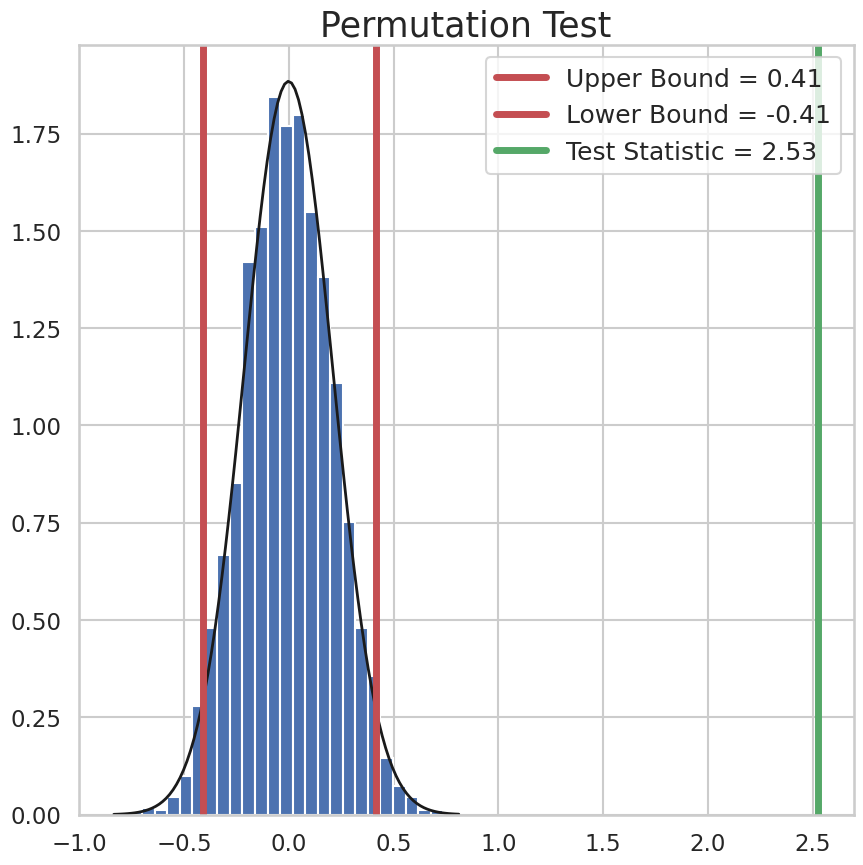

In [ ]:
from scipy.stats import norm
import statistics

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(simulated_diffs)

plt.figure(figsize = (10,10))

# Plot the histogram.
plt.hist(simulated_diffs, bins=25, density=True, alpha=1, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
#title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title('Permutation Test', fontsize = 25)

plt.axvline(x = lower_bound, label = 'Upper Bound = ' + str(upper_bound.round(2)), c = 'r', lw = 5)
plt.axvline(x = upper_bound, label = 'Lower Bound = ' + str(lower_bound.round(2)), c = 'r', lw = 5)
plt.axvline(x = diff, label = 'Test Statistic = ' + str(diff.round(2)), c = 'g', lw = 5)

plt.legend(loc = 'best', fontsize = 18)
#plt.figure(figsize = (8,8))

plt.show()

Conclusion

---


The 95% confidence interval is (-0.42 to 0.42) and the real difference is 2.53. Since the real difference is outside of the confidence interval, we reject the null hypothesis that the 2022 and 2023 pith tempos are the same.

# Interactive Visualization

In [ ]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.2 MB/s eta 0:00:00


In [ ]:
!pip install panel

In [ ]:
import panel as pn
pn.extension('tabulator')
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
from panel.interact import interact

In [ ]:
#!pip install --upgrade hvplot panel bokeh ipykernel holoviews ipywidgets

In [ ]:
pn.extension(comms = 'colab')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
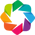

:NdOverlay   [Name_x]
   :Scatter   [tempo_diff]   (k_diff)

In [ ]:
plot = l2.hvplot.scatter(x = 'tempo_diff', y = 'k_diff', by = 'Name_x')
hv.extension('bokeh')
plot

In [ ]:
hvexplorer = l2.hvplot.explorer()
hvexplorer

hvDataFrameExplorer(advanced=Advanced(explorer=..., name='Advanced04344', opts=None), axes=Axes(explorer=..., height=None, legend='bottom_right', logx=False, logy=False, name='Axes04338', responsive=True, shared_axes=True, width=None, xlim=None, ylim=None), by=[], code="df.hvplot(\n    kind='scatter',\n    x='index',\n    legend='bottom_right',\n    widget_location='bottom',\n)", colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping04339', rescale_discrete_levels=True, symmetric=False), geographic=Geographic(crs=None, crs_kwargs={}, explorer=..., feature_scale='110m', features=None, geo=False, global_extent=None, name='Geographic04341', project=False, projection=None, projection_kwargs={}, tiles=None), groupby=[], kind='scatter', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels04340', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer04316', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations04342', rasterize=False, x_sampling=None, y_sampling=None), statusbar=StatusBar(live_update=True, name='StatusBar04331'), style=Style(alpha=1, explorer=..., name='Style04343'), x='index', y='Name_x', y_multi=[], z=None)

In [ ]:
# Function that creates Correlation Plots for Dashboard
def get_correlation_plots(var_x, var_y):
  df = l2
  plot = df.hvplot.scatter(frame_height=300, frame_width=300, x = var_x, y = var_y,
                           title = var_x + ' vs ' + var_y, size=10, padding=0.1)
  return plot

In [ ]:
# Function that creates Line Plots for Dashboard
def get_line_plot():
  return l2.hvplot.line(frame_width=600, frame_height=600, grid=True)

In [ ]:
# Creating a time series for dashboard use

# title_time = '## Time-Series'

# #years = pn.widgets.IntSlider(name = 'Years', value = 2015, start = 2015, end = 2023, width = 200)

# time_row = pn.Row(
#     pn.Column(title_time),
#     get_line_plot()
# )

# #time_row = pn.Row(
# #    pn.Column(title_time, years),
# #   get_line_plot(years.value)
# #)


In [ ]:
# Button Widget
checkbutton_group = pn.widgets.CheckButtonGroup(name='Years', value=['2022', '2023'], options=['2015', '2016', '2017', '2018', '2019', '2021', '2022', '2023'])
checkbutton_group

CheckButtonGroup(name='Years', options=['2015', '2016', ...], value=['2022', '2023'])

In [ ]:
# Creates Corrlation Graph Interactive Visual
correlation_title = '# 2022 and 2023 Correlations'
correlation_note = """Variables ending in an x represent 2022 \n and ending in y represent 2023."""

var_x = pn.widgets.Select(name = 'x-axis', options=list(l2.columns), width = 200)
var_y = pn.widgets.Select(name = 'y-axis', options=list(l2.columns), width = 200)

correlation_row = pn.Row(
    pn.Column(correlation_title, correlation_note, var_x, var_y),
    get_correlation_plots(var_x.value, var_y.value)
)

def update_correlation_row(event):
  correlation_row[1].object = get_correlation_plots(var_x.value, var_y.value)
var_x.param.watch(update_correlation_row, 'value')
var_y.param.watch(update_correlation_row, 'value')

Watcher(inst=Select(name='y-axis', options=['Name_x', 'player_id', ...], value='Name_x', width=200), cls=<class 'panel.widgets.select.Select'>, fn=<function update_correlation_row at 0x79fa23801cf0>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [ ]:
#Run dashboard
dashboard = pn.Column(correlation_row)
dashboard

Column
    [0] Row
        [0] Column
            [0] Markdown(str)
            [1] Markdown(str)
            [2] Select(name='x-axis', options=['Name_x', 'player_id', ...], value='Name_x', width=200)
            [3] Select(name='y-axis', options=['Name_x', 'player_id', ...], value='Name_x', width=200)
        [1] HoloViews(Scatter, sizing_mode='fixed')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
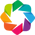

:NdOverlay   [Name]
   :Curve   [year]   (median_seconds_empty)

In [ ]:
# Example line plot
plot = new_df2.hvplot.line(x = 'year', y = 'median_seconds_empty', by ='Name')
hv.extension('bokeh')
plot

In [ ]:
# Another way to create a line plot
def get_line_plot(y_var):
  plot = new_df2.hvplot.line(x = 'year', y = y_var, by ='Name')
  return plot

In [ ]:
# Creates Corrlation Graph Interactive Visual
line_title = '## Trends'

var = pn.widgets.Select(name = 'y-axis', options=list(new_df2.columns), width = 200)

line_row = pn.Row(
    pn.Column(line_title, var),
    get_line_plot(var.value)
)

def update_correlation_row(event):
  correlation_row[1].object = get_line_plot(var.value)
var_y.param.watch(update_correlation_row, 'value')

Watcher(inst=Select(name='y-axis', options=['Name_x', 'player_id', ...], value='Name_x', width=200), cls=<class 'panel.widgets.select.Select'>, fn=<function update_correlation_row at 0x79fa21bded40>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [ ]:
# Retrieves player's name text input
def get_player_name():
  text_input = pn.widgets.TextInput(name='Text Input', placeholder='Enter a Player Name')
  return text_input.value

In [ ]:
# Creates Text Input
text_input = pn.widgets.TextInput(name='Text Input', placeholder='Enter a Player Name')
text_input

TextInput(name='Text Input', placeholder='Enter a Player Name')

In [ ]:
# Creates table of player's stats
def create_table(player):
  table_widget = pn.widgets.Tabulator(l2[(l2['Name_x'] == player)], frozen_columns = list('Name_x'))
  return table_widget

In [ ]:
# Creates table with given dataframe
def create_new_table(df):
  return pn.widgets.Tabulator(df)

In [ ]:
#Create dashboard table using text input
table_title = '## Player Stats'

text_input = pn.widgets.TextInput(name='Text Input', placeholder='Enter a Player Name')

# @pn.depends(text_input)
table_row = pn.Row(
    pn.Column(table_title, text_input),
    create_table(text_input.value)
)

def update_text_input(event):
  text_input[1].object = create_table(text_input.value)
text_input.param.watch(update_text_input, 'value')

Watcher(inst=TextInput(name='Text Input', placeholder='Enter a Player Name'), cls=<class 'panel.widgets.input.TextInput'>, fn=<function update_text_input at 0x79fa1b238430>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [ ]:
#Create dashboard table using drop down
table_title = '## Player Stats'

text_input = pn.widgets.Select(name='Player', options=list(l2['Name_x']), width = 200)
df_rx = pn.rx(l2[(l2['Name_x'] == text_input.value)])

def update_df():
  df_rx = pn.rx(l2[(l2['Name_x'] == text_input.value)])
  return df_rx

# @pn.depends(text_input)
table_row = pn.Row(
    pn.Column(table_title, text_input),
    #create_table(text_input.value)
    create_new_table(df_rx)
)

#df_rx = pn.rx(l2[(l2['Name_x'] == text_input)])

pn.Row(pn.Column(df_rx))

def update_text_input(event):
  text_input[1].object = update_df
text_input.param.watch(update_text_input, 'value')

Watcher(inst=Select(name='Player', options=['Wainwright, ...], value='Wainwright, Adam', width=200), cls=<class 'panel.widgets.select.Select'>, fn=<function update_text_input at 0x79fa21bdea70>, mode='args', onlychanged=True, parameter_names=('value',), what='value', queued=False, precedence=0)

In [ ]:
# Creates correlations from players statistics
def get_player_correlations(player):
  df = new_df2[(new_df2['Name'] == player)]
  return df.hvplot.line(frame_height=300, frame_width=300, x = 'year', y = 'median_seconds_empty',
                           title = x + ' vs ' + y, size=10, padding=0.1)

In [ ]:
# #Create player graph for dashboard
# graph_title = '## Player Trends'

# text_input = pn.widgets.Select(name='Player', options=list(l2['Name_x']), width = 200)

# # @pn.depends(text_input)
# table_row = pn.Row(
#     pn.Column(graph_title, text_input),
#     get_player_correlations(str(text_input.value))
# )

# def update_text_input(event):
#   text_input[1].object = get_player_correlations(str(text_input.value))
# text_input.param.watch(update_text_input, 'value')

In [ ]:
#pn.serve(dashboard, port=80, websocket_origin=['*'])

In [ ]:
#dashboard.show()